In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn nltk

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib


In [3]:
import zipfile
import os

# Path to your dataset directory
dataset_path = 'C:/Users/kripa/Downloads/jigsaw-toxic-comment-classification-challenge/'

# List all files in the directory
files = os.listdir(dataset_path)

# Extract all zip files in the directory
for file in files:
    if file.endswith('.zip'):
        zip_ref = zipfile.ZipFile(os.path.join(dataset_path, file), 'r')
        zip_ref.extractall(dataset_path)
        zip_ref.close()

# Print the updated list of files after extraction
print(os.listdir(dataset_path))


['sample_submission.csv', 'sample_submission.csv.zip', 'test.csv', 'test.csv.zip', 'test_labels.csv', 'test_labels.csv.zip', 'train.csv', 'train.csv.zip']


In [4]:
import pandas as pd

# Define the path to your extracted folder
dataset_path = 'C:/Users/kripa/Downloads/jigsaw-toxic-comment-classification-challenge/'

# Load dataset
train_df = pd.read_csv(dataset_path + 'train.csv')
test_df = pd.read_csv(dataset_path + 'test.csv')
test_labels_df = pd.read_csv(dataset_path + 'test_labels.csv')
sample_submission_df = pd.read_csv(dataset_path + 'sample_submission.csv')

# Displaying the first few rows to verify
print(train_df.head())
print(test_df.head())
print(test_labels_df.head())
print(sample_submission_df.head())


                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  
                 id                                       comment_text
0  00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1  0000247867823ef7  ==

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Load dataset
dataset_path = "C:/Users/kripa/Downloads/jigsaw-toxic-comment-classification-challenge/"
train_df = pd.read_csv(dataset_path + 'train.csv')
test_df = pd.read_csv(dataset_path + 'test.csv')
test_labels_df = pd.read_csv(dataset_path + 'test_labels.csv')

# Handle missing values
train_df.fillna("", inplace=True)
test_df.fillna("", inplace=True)

# Splitting into features and target
X = train_df['comment_text']
y = train_df.drop(columns=['id', 'comment_text'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Handle missing values (if any)
y = train_df.drop(columns=['id', 'comment_text'])

# Train-test split
train_df.fillna("", inplace=True)
test_df.fillna("", inplace=True)


In [7]:
# Check the columns present in the 'y' DataFrame
print(y.columns)

# Drop unnecessary columns from the target dataframe if 'id' is not present
if 'id' in y.columns:
    y.drop(columns=['id'], inplace=True)
else:
    print("No 'id' column found in the target dataframe.")

# Convert target to binary labels (if necessary)
# For binary classification, sum all labels to create a single column indicating any toxicity
y['is_toxic'] = y.sum(axis=1).apply(lambda x: 1 if x > 0 else 0)

# Check the updated 'y' DataFrame
print(y.head())


Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')
No 'id' column found in the target dataframe.
   toxic  severe_toxic  obscene  threat  insult  identity_hate  is_toxic
0      0             0        0       0       0              0         0
1      0             0        0       0       0              0         0
2      0             0        0       0       0              0         0
3      0             0        0       0       0              0         0
4      0             0        0       0       0              0         0


In [8]:
# Correct way to assign values to avoid SettingWithCopyWarning
y.loc[:, 'is_toxic'] = y.sum(axis=1).apply(lambda x: 1 if x > 0 else 0)


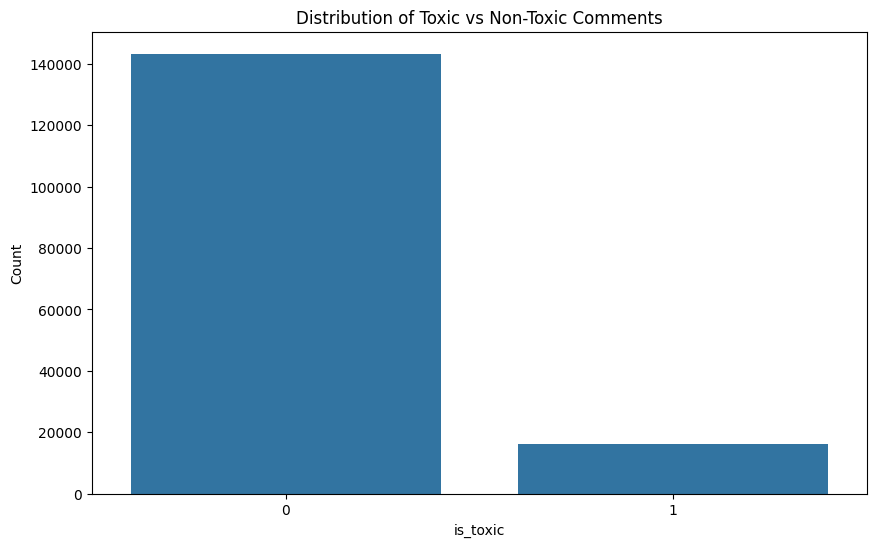

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Visualizing class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='is_toxic', data=y)
plt.title('Distribution of Toxic vs Non-Toxic Comments')
plt.xlabel('is_toxic')
plt.ylabel('Count')
plt.show()


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Example: TF-IDF vectorization (assuming you have text data)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X_tfidf = tfidf_vectorizer.fit_transform(train_df['comment_text'])


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y['is_toxic'], test_size=0.2, random_state=42)

# Initialize and train a logistic regression model
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.99      0.98     28671
           1       0.92      0.63      0.75      3244

    accuracy                           0.96     31915
   macro avg       0.94      0.81      0.86     31915
weighted avg       0.96      0.96      0.95     31915



In [12]:
import string
import re
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    
    # Remove punctuation characters
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove extra whitespace
    text = text.strip()
    
    return text

In [13]:
# Assuming `model` is your trained Logistic Regression model and `vectorizer` is your TF-IDF vectorizer

def predict_toxicity(comment, model, vectorizer):
    # Preprocess the comment (you need to apply the same preprocessing steps as used for training)
    processed_comment = preprocess_text(comment)
    
    # Vectorize the comment using the trained TF-IDF vectorizer
    comment_vectorized = vectorizer.transform([processed_comment])
    
    # Predict toxicity using the trained model
    prediction = model.predict(comment_vectorized)
    
    return prediction[0]  # Assuming you want to return the predicted label (0 or 1)

# Example usage:
comment = "This is a heaven."
predicted_toxicity = predict_toxicity(comment, model, tfidf_vectorizer)
print(f"Predicted toxicity: {predicted_toxicity}")


Predicted toxicity: 0


In [13]:
import joblib
joblib.dump(model,'logistic_regression_model.pkl')
joblib.dump(tfidf_vectorizer,'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']